# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
      # this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Data Overview

- Observations
- Sanity checks

## Import Data

In [ ]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

hotel = pd.read_csv(io.BytesIO(uploaded['INNHotelsGroup.csv']))
#hotel = pd.read_csv('INNHotelsGroup.csv')

Saving INNHotelsGroup.csv to INNHotelsGroup.csv


In [ ]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

### View the first and last 5 rows of the dataset

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Understand the shape of the dataset

In [ ]:
data.shape

(36275, 19)

There are 36275 observations and 19 rows in the given dataset

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observations**

There are a total of 36275 rows and 19 columnsin the dataset.


* Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type and booking_status are categorical while all others are numerical data types
* Non-Null Count shows that there is no missing values
* booking_status is the dependant variable

Memory usage is 5.3+ MB.

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

There is no duplicate data

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There is no null values in any of the columns

**Let's drop the Booking_ID column** 

In [ ]:
data = data.drop(["Booking_ID"], axis=1)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Let's check the statistical summary of the data.**

In [ ]:
# describe() : Computes and displays a summary of statistics pertaining to the DataFrame columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


**Observations**

- 

In [ ]:

data[["required_car_parking_space", "arrival_year", "arrival_month", "arrival_date", "repeated_guest"]] = \
data[["required_car_parking_space", "arrival_year", "arrival_month", "arrival_date", "repeated_guest"]]\
.astype("category")

In [ ]:
data.describe(include="object").T

,count,unique,top,freq
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [ ]:
# Making a list of all catrgorical variables
cat_col = [ 
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
----------------------------------------
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
----------------------------------------
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
----------------------------------------
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
----------------------------------------


* Most bookings are made with preference for Room_type 1, followed by Room_type 4 & Room_type 6
* So we decided to combine Room_Type 2,3,5,7 together make a new Room type -  Other

In [ ]:
# We will combine Room_Type 2,3,5 and 7
data.loc[data.room_type_reserved =="Room_Type 2", "room_type_reserved"] = "Others"
data.loc[data.room_type_reserved =="Room_Type 3", "room_type_reserved"] = "Others"
data.loc[data.room_type_reserved =="Room_Type 5", "room_type_reserved"] = "Others"
data.loc[data.room_type_reserved =="Room_Type 7", "room_type_reserved"] = "Others"

In [ ]:
print(data['room_type_reserved'].value_counts())

Room_Type 1    28130
Room_Type 4     6057
Others          1122
Room_Type 6      966
Name: room_type_reserved, dtype: int64


**Observations**


### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on no of adults and no of children

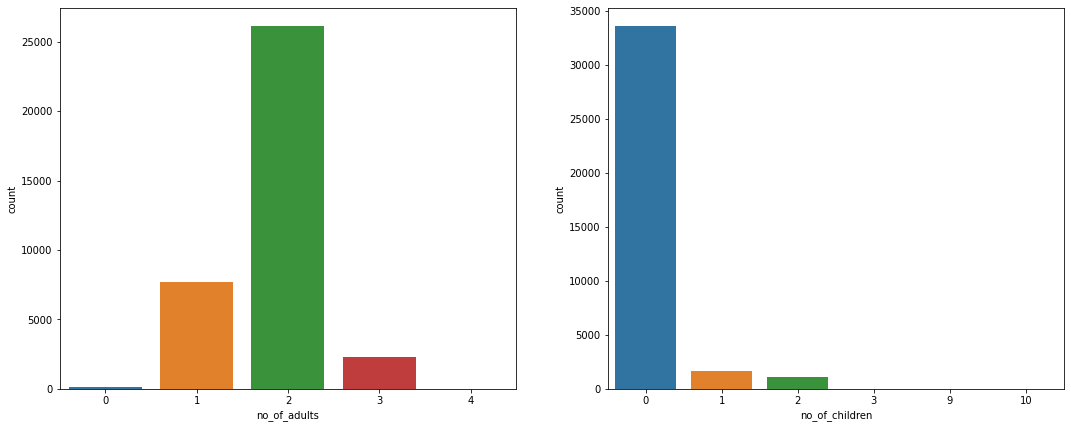

In [ ]:
fig,ax=plt.subplots(1,2, figsize=(18,7))
sns.countplot(data=data, x="no_of_adults", ax=ax[0]);
sns.countplot(data=data, x="no_of_children", ax=ax[1]);

* Number of adults is 2 for most of the bookings.
* number of children is 0 for most of the bookings.

### Observations on no of weeks night and no of weekend nights

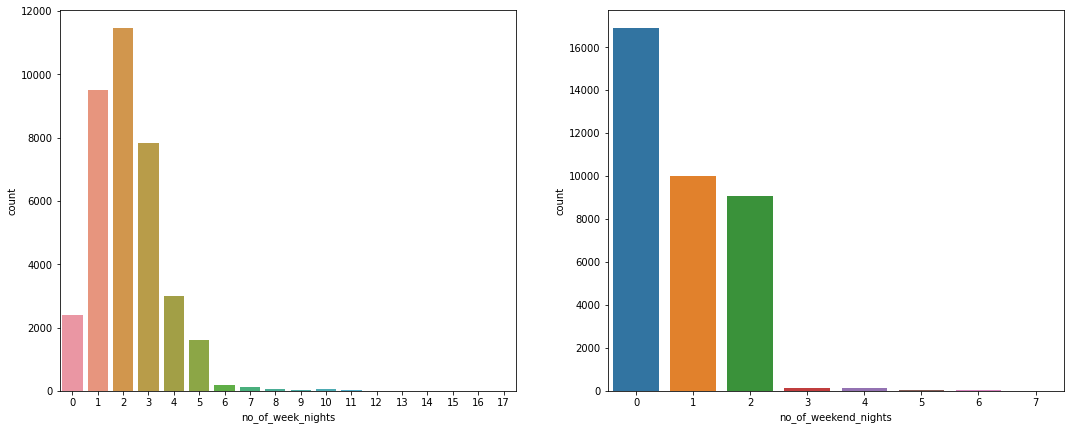

In [ ]:
fig,ax=plt.subplots(1,2, figsize=(18,7))
sns.countplot(data=data, x="no_of_week_nights", ax=ax[0]);
sns.countplot(data=data, x="no_of_weekend_nights", ax=ax[1]);

* Majority bookings for no_of_week_nights is for 2 nights.
* Majority bookings for no_of_weekend_nights is 0 indicating that most of the bookings are made for weekdays. Some reservations are there for 1 or 2 weekend nights i.e. booked for satday or sunday or both. Very few number of bookings are there for 3,4,5,6 wweekend nights which is probably due a month's or longer booking.

###Observations on type_of_meal_plan

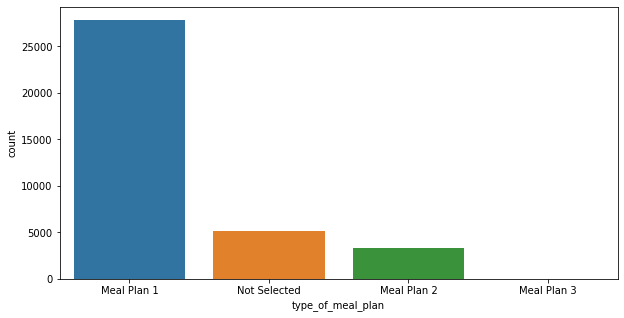

In [ ]:
plt.figure(figsize=(10,5)) 
sns.countplot(data=data, x="type_of_meal_plan")

* Majority of the bookings chose Meal Plan 1 , followed by Meal plan not selected. Meal Plan 3 was selected by no one.

### Observations on lead time

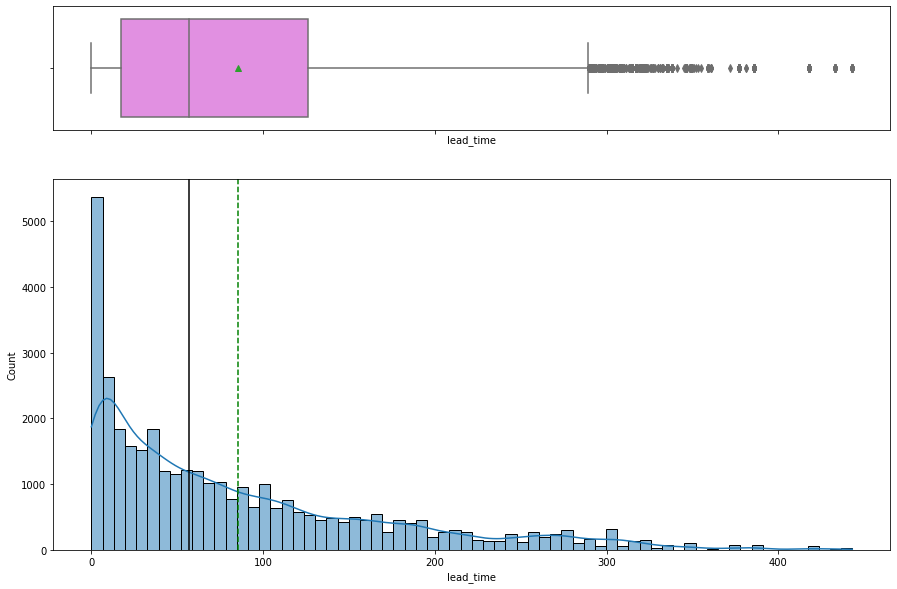

In [ ]:
histogram_boxplot(data, "lead_time", kde = True)

* Lead time is right skewed with many outliers after 280 days. Most of the booking are near to the check in date with mean of 85 days and median of 57 days.

### Observations on average price per room

In [ ]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)  # Calculate 75th quantile for average price per room

# Calculating IQRm
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

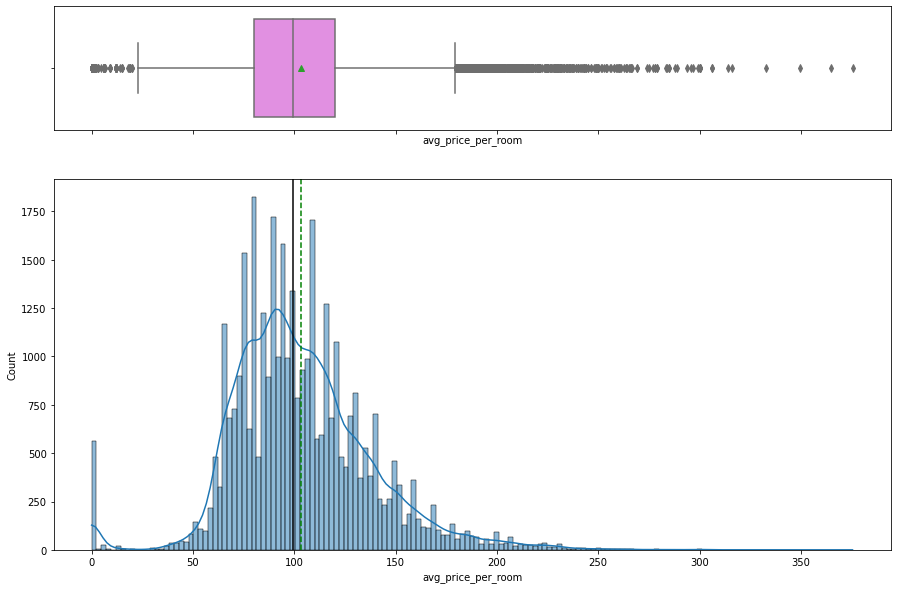

In [ ]:
histogram_boxplot(data, "avg_price_per_room", kde=True)

* avg_price_per_room is right skewded with some outliers. Average price of room is 103 and median is 99 euros

### Observations on number of previous booking cancellations

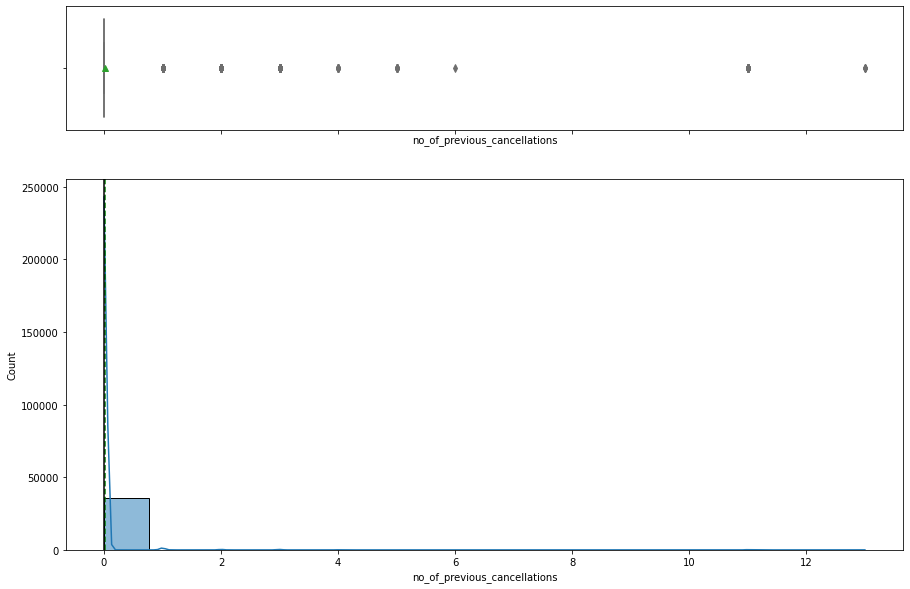

In [ ]:
histogram_boxplot(data, 'no_of_previous_cancellations', kde=True)

* Most of the no_of_previous_cancellations is 0 which might be indicating that most of the customers are new.
* However, there few cutomers with no of previous cancellation as 2 to as high as 12.

### Observations on number of previous booking not canceled

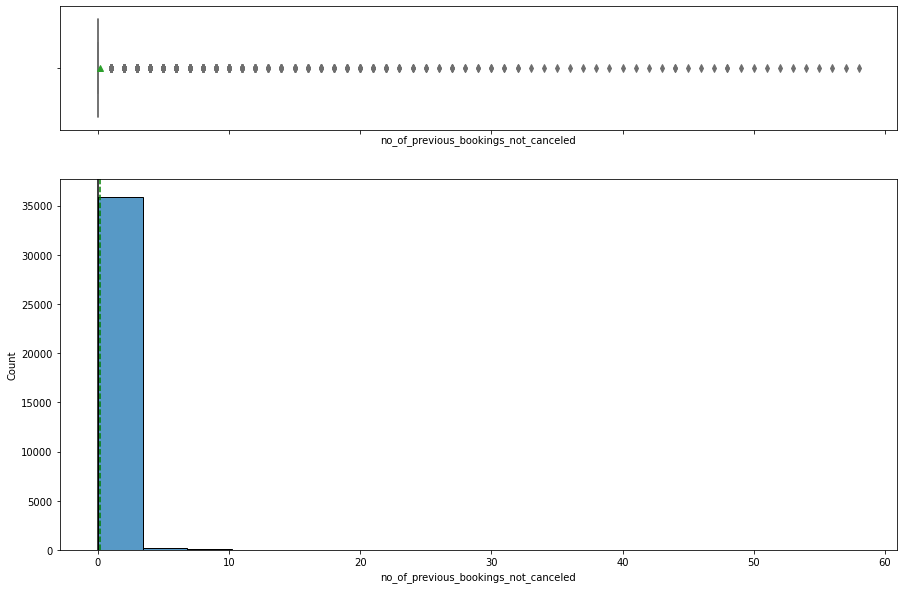

In [ ]:

histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

* Most of the no_of_prevous_bookings_not_canceled is 0 , again it might be due to majority is new customers.
* However, there are few customers with 1 to 60 previous booking cancellation.

### Observtions on no of special requests

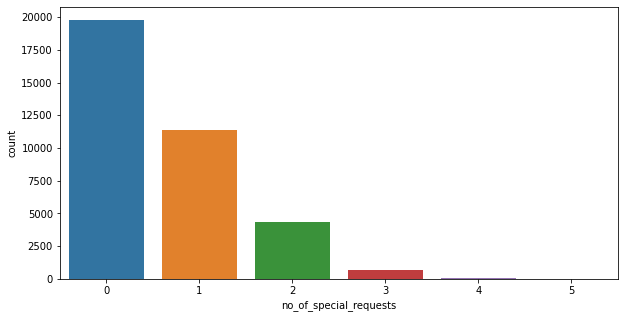

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="no_of_special_requests")

* Majority of the bookings does not have any special requests.
* Some of the bookings have 1 ,2 special requests. Few outliers are there upto 5 special requests.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center", 
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on required car parking space

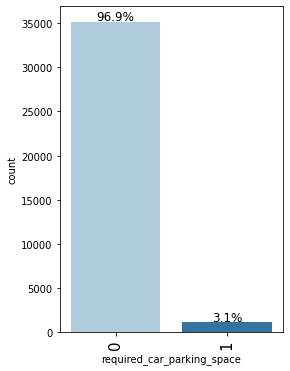

In [ ]:
labeled_barplot(data, "required_car_parking_space" , perc=True);

* Most of the customers (97%) did not request for a parking space

### Observations on required car repeated guest

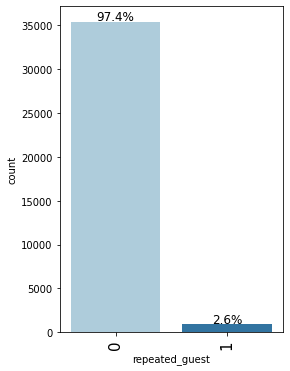

In [ ]:
labeled_barplot(data, "repeated_guest" , perc=True);

* Most of the guests (97.4%) are new guests.

### Observations on booking status

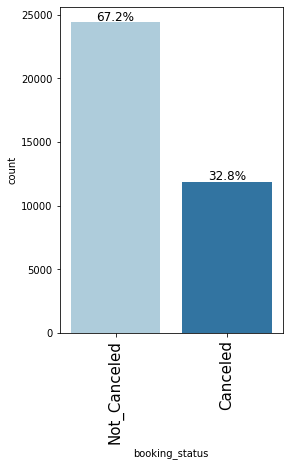

In [ ]:
labeled_barplot(data, "booking_status", perc=True);

* 67% bookings are not cancelled but almost 33% bookings are cancelled

**Let's encode Canceled bookings to 0 and Not_Canceled as 1 for further analysis**

In [ ]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 0 if x == "Canceled" else 1
)

### Observations on room type reserved

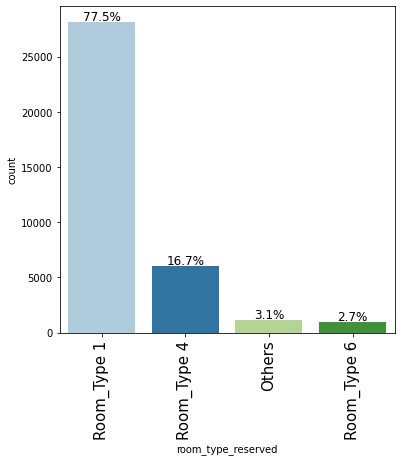

In [ ]:
labeled_barplot(data, "room_type_reserved", perc=True);

* Most of the bookings 77.5% are for Room_Type_1. Followed by 16.7%
* It seems like no one booked Room type 3 and also type 5 , 7 are not so popular.

### Observations on arrival month

In [ ]:
# arrival_year, arrival_month, arrival_day = arrival_date_YYYYMMDD
# An impossibe date February 29 2018 was identified in the dataset occuring 37 times, to be dropped

data.loc[(data["arrival_year"]==2018) & (data["arrival_month"]==2) & (data["arrival_date"]==29)].count()\
        ["arrival_date"]     

37

In [ ]:
#Dropping the data set with wrong date as 29th Feb 2018
data.drop(data[(data["arrival_year"]==2018) & (data["arrival_month"]==2) & \
                          (data["arrival_date"]==29)].index, inplace=True)
data.shape

(36238, 18)

There are 36238 rows after dropping the wrong date 29th feb 2018

In [ ]:
# combining arrival_year, arrival_month & arrival_date as new column arrival_date_YYYYMMDD

from datetime import datetime
data["arrival_date_YYYYMMDD"] = pd.to_datetime(data.arrival_year.astype(str)+'/'+ \
                                               data.arrival_month.astype(str)+'/'+ \
                                               data.arrival_date.astype(str))

In [ ]:
print(data["arrival_date_YYYYMMDD"].min())
print(data["arrival_date_YYYYMMDD"].max())

2017-07-01 00:00:00
2018-12-31 00:00:00


* Dataset has arrival date starting from Jul, 2017 to Dec 2018

In [ ]:
data = data.drop(["arrival_year", "arrival_date", "arrival_date_YYYYMMDD"],axis=1) #dropping arrival_year and arrival_date

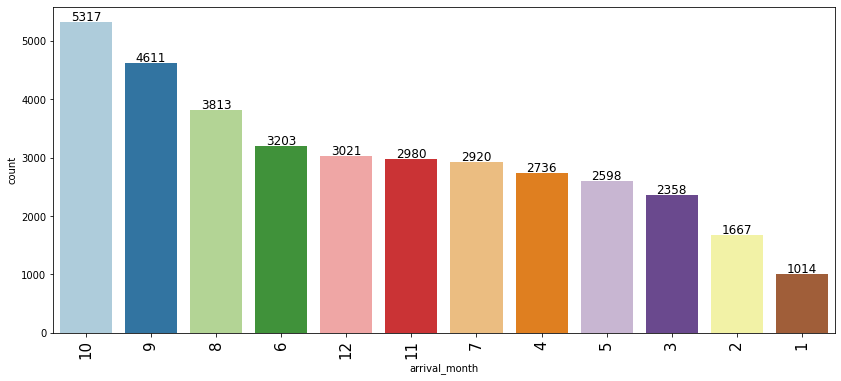

In [ ]:
labeled_barplot(data , "arrival_month") 

* Most of the bookings are made for August, Sept and October.
* We observe that there are less booking for winter months - Jan, Feb and March.

In [ ]:
# Categorizing the months as per seasons
data["arrival_month"] = data["arrival_month"].astype("object")

data.loc[data.arrival_month==1, "arrival_month"] = "Winter"
data.loc[data.arrival_month==2, "arrival_month"] = "Winter"
data.loc[data.arrival_month==3, "arrival_month"] = "Spring"
data.loc[data.arrival_month==4, "arrival_month"] = "Spring"
data.loc[data.arrival_month==5, "arrival_month"] = "Spring"
data.loc[data.arrival_month==6, "arrival_month"] = "Summer"
data.loc[data.arrival_month==7, "arrival_month"] = "Summer"
data.loc[data.arrival_month==8, "arrival_month"] = "Summer"
data.loc[data.arrival_month==9, "arrival_month"] = "Fall"
data.loc[data.arrival_month==10, "arrival_month"] = "Fall"
data.loc[data.arrival_month==11, "arrival_month"] = "Fall"
data.loc[data.arrival_month==12, "arrival_month"] = "Winter"

data["arrival_month"] = data["arrival_month"].astype("category")

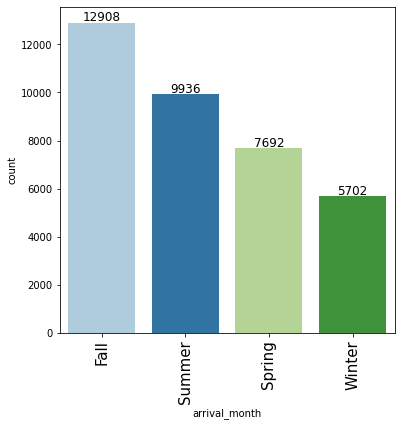

In [ ]:
# arrival_month
labeled_barplot(data, "arrival_month")

* Months of fall and summer are the most popular seasons with almost 13k and 10k booking. Winter seems to be not a popular time.

### Observations on market segment type

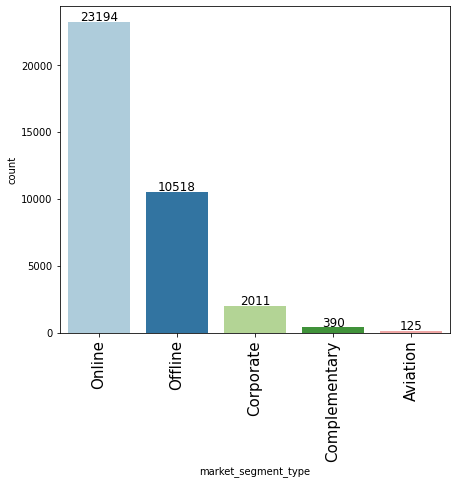

In [ ]:
labeled_barplot(data , "market_segment_type") 

* Most bookings made are online, followed by offline, corporate & then complimentary

### Bivariate Analysis

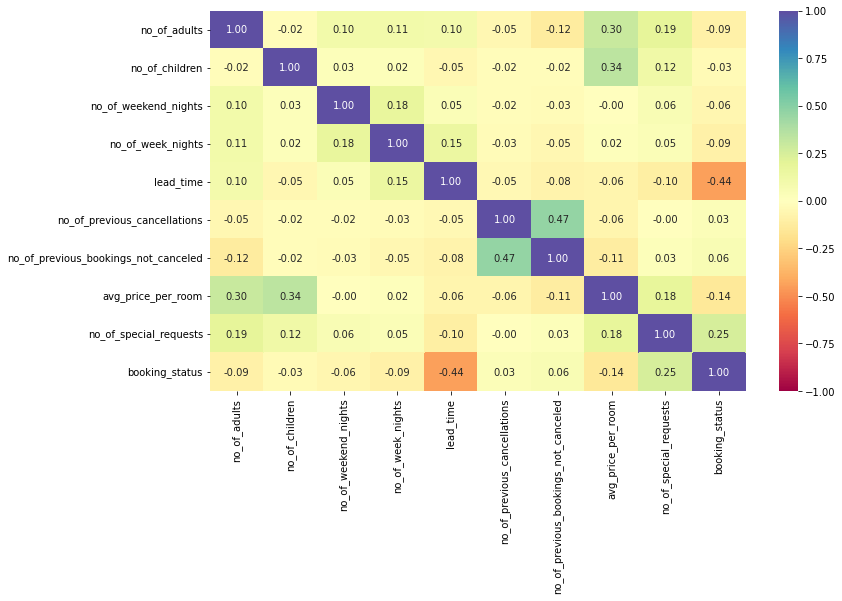

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**

* Almost moderate linear correlation of 0.47 is observed between no_of_previous_bookings_not_canceled & no_of_previous_cancelations. Mostly this is data for returning guests which implies if more bookings are made, both no. of canceled and uncanceled bookings increase.
* lead time and booking status has moderate linear correlation of .44
* average prie per room had low correlation of .30 & .34 with no_of_adults and no_of_children

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments

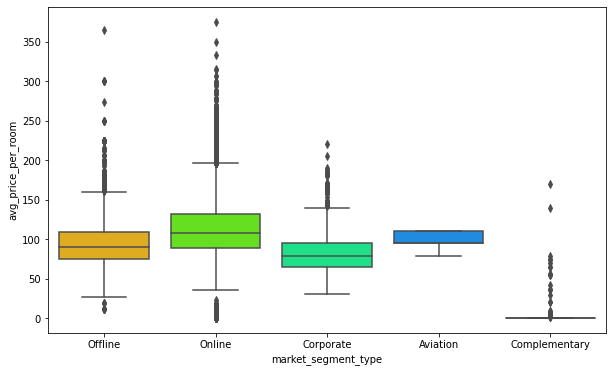

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

**Observations:**
* The min, median & max avg_price_per_room for online market segment is higher than other segments such as offline, aviation, corporate etc
* Complimentary room has lowest avg_price_per_room across all market segments.

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  11878  24360  36238
Online                8469  14725  23194
Offline               3152   7366  10518
Corporate              220   1791   2011
Aviation                37     88    125
Complementary            0    390    390
------------------------------------------------------------------------------------------------------------------------


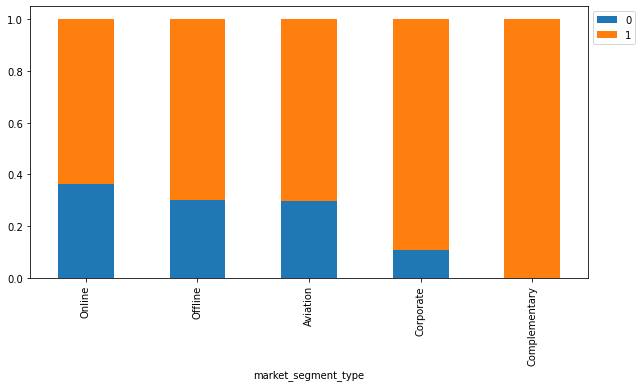

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

**Observations:**
* Across all market segments, online has highest bookings and highest cancellation than others. Complimentary has no cancellation at all.

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status              0      1    All
no_of_special_requests                     
All                     11878  24360  36238
0                        8540  11211  19751
1                        2701   8662  11363
2                         637   3726   4363
3                           0    675    675
4                           0     78     78
5                           0      8      8
------------------------------------------------------------------------------------------------------------------------


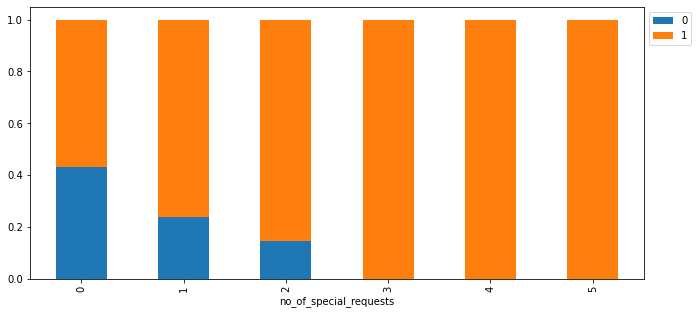

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status") ## stacked barplot for no of special requests and booking status

* More bookings are cancelled when there is no special_requests made. Bookings with 3 or more no_of_special_requests have 0 cancellations

**Booking status and average price per room**

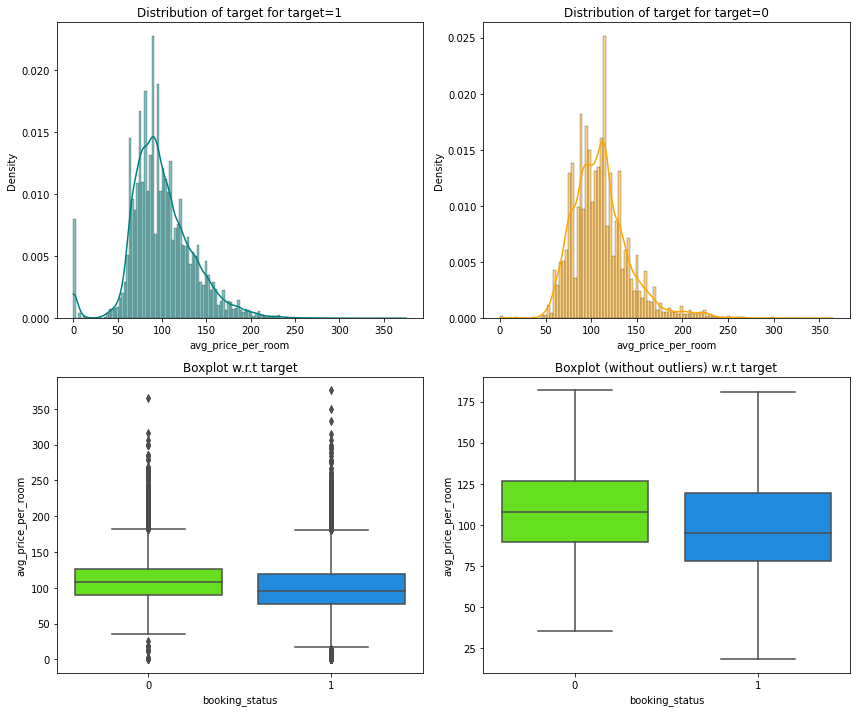

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")


* avg price per room is higher for boooking status 0 which is cancelled 

**booking status and lead time**

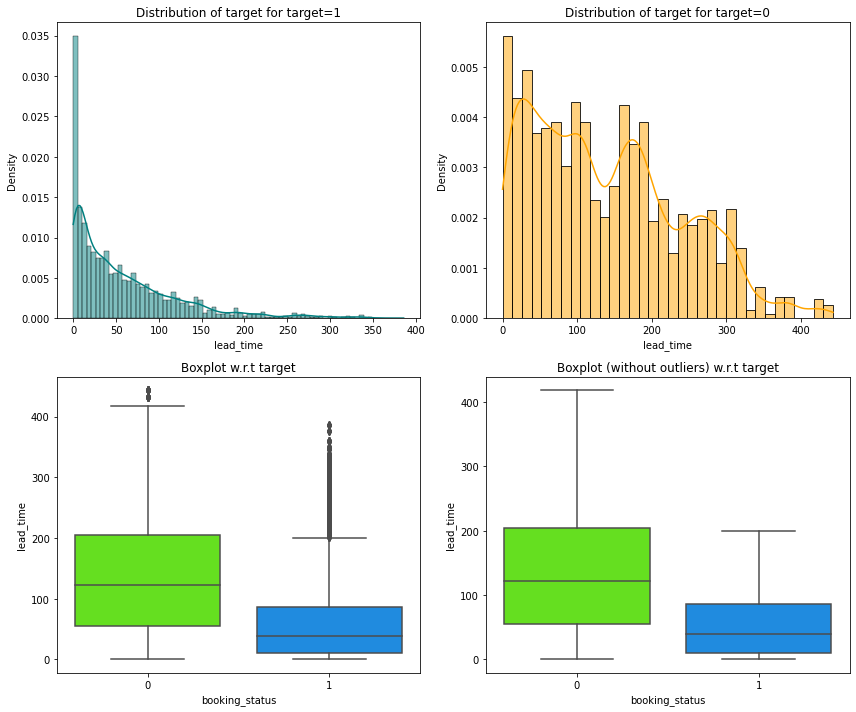

In [ ]:
distribution_plot_wrt_target(data, "lead_time","booking_status") ## distribution of lead time wrt booking status

* Min, max and avg lead time is higher for booking cancelled than bookings not cancelled.

**Family and Booking status**

In [ ]:
#Filtering out data for booking made for family
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28423, 16)

In [ ]:
# Adding no of children and no of adults to get total family members
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status           0      1    All
no_of_family_members                    
All                   9980  18443  28423
2                     8210  15496  23706
3                     1366   2424   3790
4                      398    512    910
5                        5     10     15
11                       1      0      1
12                       0      1      1
------------------------------------------------------------------------------------------------------------------------


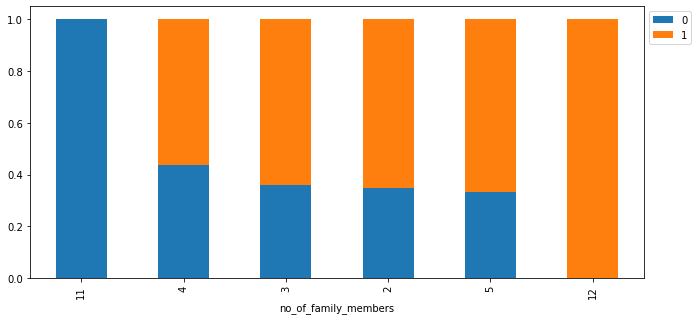

In [ ]:
## Code to plot stacked barplot for no of family members and booking
stacked_barplot(family_data, "no_of_family_members" , "booking_status") 

* From the above chart, it seems family with 2 to 5 kids has almost same cancellation. 
* For large family, one booking has been cancelled, another not. However we are unable to draw any clear conclusion on large family based on this data. 

**Analysis for the customer who stay for at least a day at the hotel.**

In [ ]:
#Filtering out data for bookings with at least one day stay
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17061, 16)

In [ ]:
#Adding up week days and weekend nights to get total number of days of stayings
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

no_of_weekend_nights     1     2    3    4   5   6  7    All
total_days                                                  
All                   8441  8284  152  129  34  20  1  17061
24                       0     0    0    0   0   0  1      1
3                     3395  2466    0    0   0   0  0   5861
23                       0     0    0    0   0   2  0      2
22                       0     0    0    0   0   2  0      2
21                       0     0    0    0   0   4  0      4
20                       0     0    0    0   5   6  0     11
19                       0     0    0    1   1   4  0      6
18                       0     0    0    0   1   2  0      3
17                       0     0    0    0   5   0  0      5
16                       0     0    0    2   4   0  0      6
15                       0     0    0   13  18   0  0     31
2                     1933     0    0    0   0   0  0   1933
13                       0     0    7   11   0   0  0     18
12                      

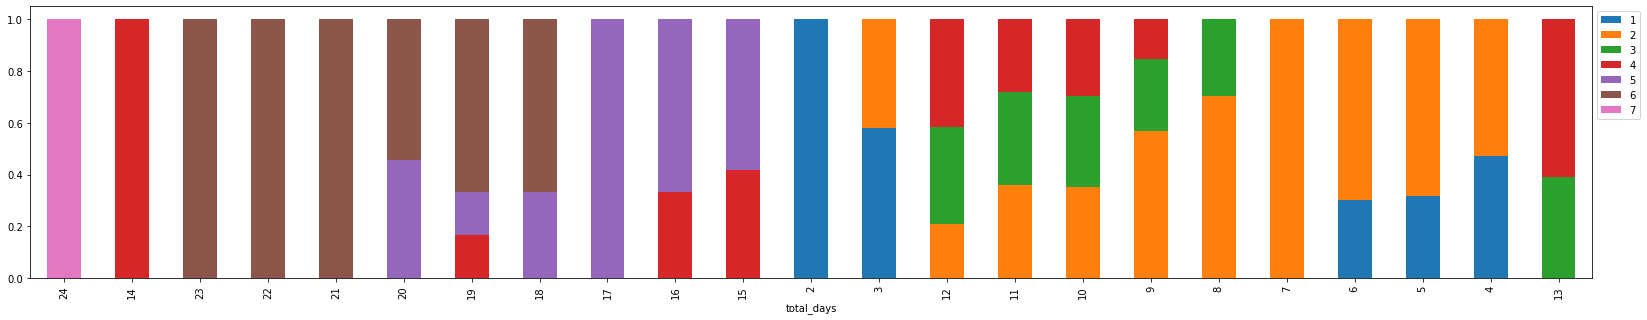

In [ ]:
## The code to plot stacked barplot for total days and booking status
stacked_barplot(stay_data , 'total_days' , 'no_of_weekend_nights') 

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

**repeated guests and booking status**

no_of_previous_cancellations    0    1   2   3   4   5  6  11  13  All
repeated_guest                                                        
1                             589  197  46  43  10  11  1  25   4  926
All                           589  197  46  43  10  11  1  25   4  926
------------------------------------------------------------------------------------------------------------------------


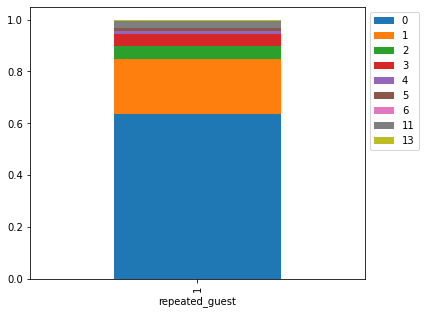

In [ ]:
# stacked barplot repeated_guest & no_of_previous_cancellations

stacked_barplot(data[data["repeated_guest"]==1], "repeated_guest", "no_of_previous_cancellations")

Of the 930 repeated_guests, 64% (592 numbers) have 0 previous cancellations which is 64% & 198 have 1 previous cancellation (28%) & remaining have more (all the way upto 13 previous cancellations)

**Let's find out what are the busiest months in the hotel.**

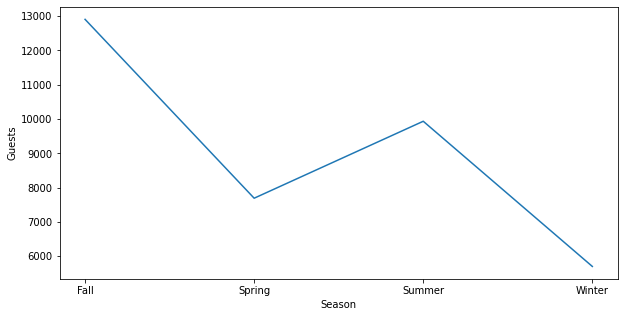

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Season": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Season", y="Guests")
plt.show()

**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             11878  24360  36238
Fall             4293   8615  12908
Summer           4093   5843   9936
Spring           2643   5049   7692
Winter            849   4853   5702
------------------------------------------------------------------------------------------------------------------------


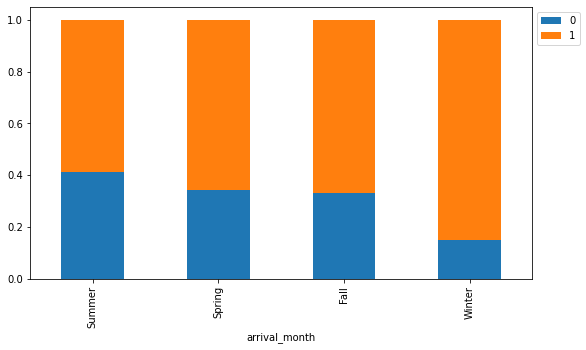

In [ ]:
stacked_barplot( data, 'arrival_month', 'booking_status')

* Fall has more no of bookings and also, more no of cancellation

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

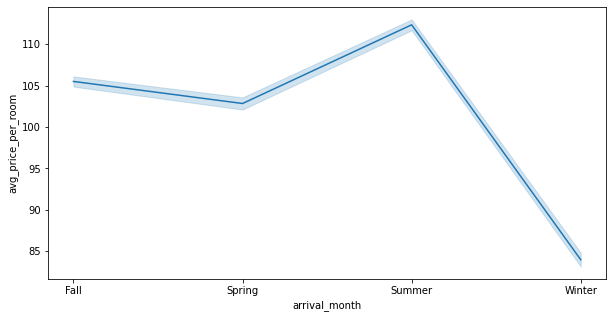

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot( data= data, x='arrival_month', y='avg_price_per_room') ## Complete the code to create lineplot between average price per room and arrival month
plt.show()

* It seems May to Sept is the best season for hotel booking when rooms are on highest price.
* Winter months, Nov to Feb are off season and room price is quite low.

### EDA Summary

* Most of the bookings are made for 2 adults and 0 kids.
* Majority bookings for weekend nights is 0 indicating that most of the bookings are made for weekdays.


* Majority of customers chose Meal Plan 1 while booking, followed by Meal plan not selected. Meal Plan 3 was selected by no one.
 >> Hotel management team should made some improvements on meal plan 3 and promote it by giving discount while booking. 

* Lead time is right skewed with many outliers after 280 days. Most of the booking are near to the check in date with mean of 85 days and median of 57 days.
 >> Seems like there is no restrictions on how many days before the booking can be made. There has to be some policy to restrict advance booking time.
* avg_price_per_room is right skewded with some outliers. Average price of room is 103 and median is 99 euros

* Majority of the bookings does not have any special requests.

 >> Customers should be encouraged to place special request. Hotel should promote it properly.

* Most of the customers (97%) did not request for a parking space

* Most of the guests (97.4%) are new guests.
* Most of the bookings 77.5% are for Room_Type_1. Followed by 16.7.It seems like no one booked Room type 3 and also type 5 , 7 are not so popular.                

 >> Management should have a plan to renovate or upgrade these room to be as good as room type 1 and promote it

* Months of fall and summer are the most popular seasons with almost 13k and 10k booking. Winter seems to be not a popular time.
* Most bookings made are online, followed by offline, corporate & then complimentary

**Correlations:**
- Correlation observed between avg room price and no of adults & children 
- Strong negative correlation observed between booking  status and lead time.
- Strong relationship observed between previous bookings not canceled & no of previous cancelations 

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

###Outlier Check

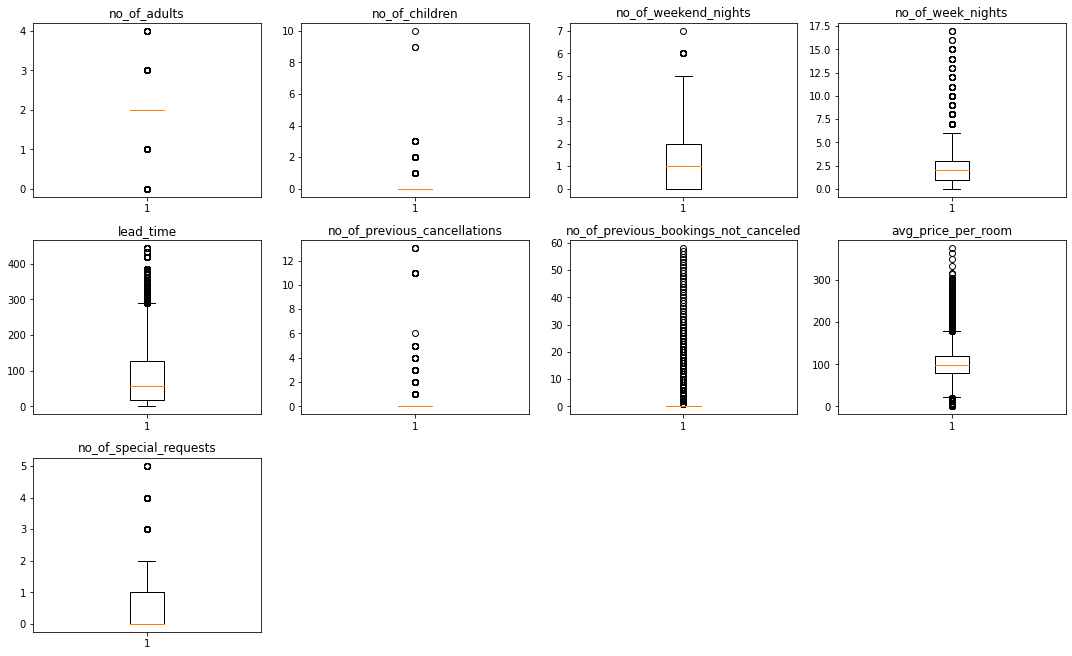

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

#X = pd.'_______'  ## Complete the code to create dummies for X 
# creating dummy variables for independent features
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
) 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25366, 24)
Shape of test set :  (10872, 24)
Percentage of classes in training set:
1   0.67074
0   0.32926
Name: booking_status, dtype: float64
Percentage of classes in test set:
1   0.67568
0   0.32432
Name: booking_status, dtype: float64


* We had seen that around 67% of observations belongs to class 0 (Cancelled) and 32% observations belongs to class 1 (Not cancelled), and this is preserved in the train and test sets

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with statsmodels library)

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,no_of_adults,18.29766
1,no_of_children,2.11711
2,no_of_weekend_nights,1.97703
3,no_of_week_nights,3.69029
4,lead_time,2.51675
5,no_of_previous_cancellations,1.28270
6,no_of_previous_bookings_not_canceled,1.57449
7,avg_price_per_room,18.74460
8,no_of_special_requests,2.02386
9,type_of_meal_plan_Meal Plan 2,1.31740


In [ ]:
X.drop("market_segment_type_Online", axis=1, inplace=True)
X.drop("market_segment_type_Offline", axis=1, inplace=True)
X.drop("no_of_adults", axis=1, inplace=True)
X.drop("avg_price_per_room", axis=1, inplace=True)
X.drop("room_type_reserved_Room_Type 1", axis=1, inplace=True)
vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
)

In [ ]:
print(vif_series)

const                                  8.68919
no_of_children                         1.79116
no_of_weekend_nights                   1.05270
no_of_week_nights                      1.09229
lead_time                              1.21064
no_of_previous_cancellations           1.35107
no_of_previous_bookings_not_canceled   1.60852
no_of_special_requests                 1.09763
type_of_meal_plan_Meal Plan 2          1.09923
type_of_meal_plan_Meal Plan 3          1.00846
type_of_meal_plan_Not Selected         1.11768
required_car_parking_space_1           1.03157
room_type_reserved_Room_Type 4         1.11450
room_type_reserved_Room_Type 6         1.74010
arrival_month_Spring                   1.29327
arrival_month_Summer                   1.30997
arrival_month_Winter                   1.26130
market_segment_type_Complementary      1.08776
market_segment_type_Corporate          1.35571
repeated_guest_1                       1.74285
dtype: float64


Multicollinearity has been removed as all VIFs < 5

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25366
Model:                          Logit   Df Residuals:                    25346
Method:                           MLE   Df Model:                           19
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                  0.2573
Time:                        14:48:12   Log-Likelihood:                -11937.
converged:                      False   LL-Null:                       -16073.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    1.7234      0.047     36.583      0.000       1.631       1.816
no_of_children                          -0.6318      0.055    -11.445      0.000      -0.740      -0.524
no_of_weekend_nights                    -0.1532      0.018     -8.289      0.000      -0.189      -0.117
no_of_week_nights                       -0.0246      0.012     -2.133      0.033      -0.047      -0.002
lead_time                               -0.0122      0.000    -55.555      0.000      -0.013      -0.012
no_of_previous_cancellations            -0.2962      0.089     -3.313      0.001      -0.471      -0.121
no_of_previous_bookings_not_canceled     0.0254      0.060      0.424      0.671      -0.092       0.143
no_of_special_requests                   1.0415      0.026     40.119      0.000       0.991       1.092
type_of_meal_plan_Meal Plan 2            0.1736      0.055      3.132      0.002       0.065       0.282
type_of_meal_plan_Meal Plan 3          -18.9627   6906.077     -0.003      0.998   -1.36e+04    1.35e+04
type_of_meal_plan_Not Selected          -0.7597      0.048    -15.866      0.000      -0.854      -0.666
required_car_parking_space_1             1.0192      0.129      7.898      0.000       0.766       1.272
room_type_reserved_Room_Type 4          -0.7160      0.044    -16.208      0.000      -0.803      -0.629
room_type_reserved_Room_Type 6          -0.3705      0.132     -2.802      0.005      -0.630      -0.111
arrival_month_Spring                    -0.2175      0.043     -5.100      0.000      -0.301      -0.134
arrival_month_Summer                    -0.2067      0.040     -5.159      0.000      -0.285      -0.128
arrival_month_Winter                     0.9847      0.059     16.736      0.000       0.869       1.100
market_segment_type_Complementary       35.8069   1.04e+04      0.003      0.997   -2.04e+04    2.05e+04
market_segment_type_Corporate            0.2359      0.094      2.507      0.012       0.051       0.420
repeated_guest_1                         2.9432      0.533      5.519      0.000       1.898       3.988
========================================================================================================
"""

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_1', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 6', 'arrival_month_Spring', 'arrival_month_Summer', 'arrival_month_Winter', 'market_segment_type_Corporate', 'repeated_guest_1']


In [ ]:
X_train1 = X_train[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25366
Model:                          Logit   Df Residuals:                    25349
Method:                           MLE   Df Model:                           16
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                  0.2553
Time:                        14:48:13   Log-Likelihood:                -11970.
converged:                       True   LL-Null:                       -16073.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.7485      0.047     37.288      0.000       1.657       1.840
no_of_children                    -0.6264      0.055    -11.436      0.

All p values are now <0.05. We will consider columns in X_train1 as final and lg1 as the final model

Observations
* Negative values of coefficients indicates that booking is more likely to be canceled with an increase of that attribute value & vice versa for positive values of coefficients
* Any attribute with a p value of <0.05 will be considered significant
We dropped the column with the highest p-value. This is being repeated untill all there is no attribute with P value >0.5


###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
import numpy as np
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns)

,Odds,Change_odd%
const,5.74570,474.56961
no_of_children,0.53449,-46.55057
no_of_weekend_nights,0.85587,-14.41309
no_of_week_nights,0.97349,-2.65147
lead_time,0.98776,-1.22372
no_of_previous_cancellations,0.74069,-25.93117
no_of_special_requests,2.83465,183.46483
type_of_meal_plan_Meal Plan 2,1.18418,18.41756
type_of_meal_plan_Not Selected,0.46251,-53.74939
required_car_parking_space_1,2.76765,176.76498


**Attributes contributing to No Cancellation** :
no_of_special_requests, type_of_meal_plan_Meal Plan 2, required_car_parking_space_1, arrival_month_Winter, repeated_guest_1

Repeated Guests contribute the maximum to No_Cancelations. Guests who made special requests or had requirements like meal plan 2 & parking are less likely to cancel their booking. 

**Attributes contribuiting to Cancelations**
No_of_weekend_nights, no_of_week_nights, avg_price_per_room, lead_time, no_of_previous_cancellations, type_of_meal_plan_Not Selected, room_type_reserved_Room_Type 4, room_type_reserved_Room_Type 6, arrival_month_Spring, arrival_month_Summer


Guests who have previously canceled a booking or bookings with more expensive rates and meal type not selected are the most contributing to Cancelations.  arrival month Summer & spring also contributing in cancellation , but we also need to keep in mind that , no of bookings are high in summer.

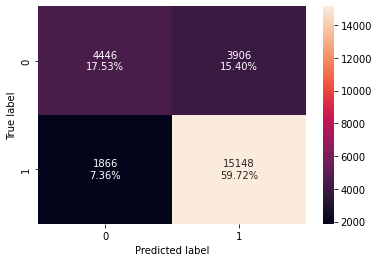

In [ ]:
#### Checking model performance on the training set

# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.77245,0.89033,0.79500,0.83997


#### ROC-AUC
* ROC-AUC on training set

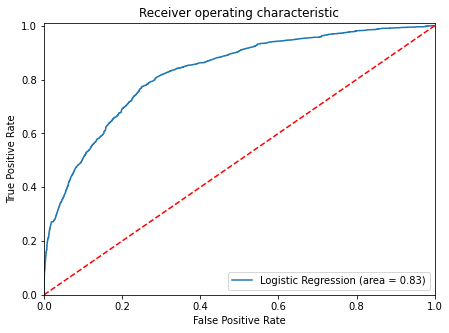

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.


### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6643648519898131


As per ROC Curve , optimal threshod is 0.66

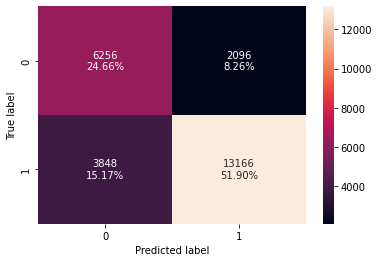

In [ ]:
#### Checking model performance on training set

# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.76567,0.77383,0.86267,0.81584


Precision of the model has increased but other metrics have decreased

#### Let's use Precision-Recall curve and see if we can find a better threshold

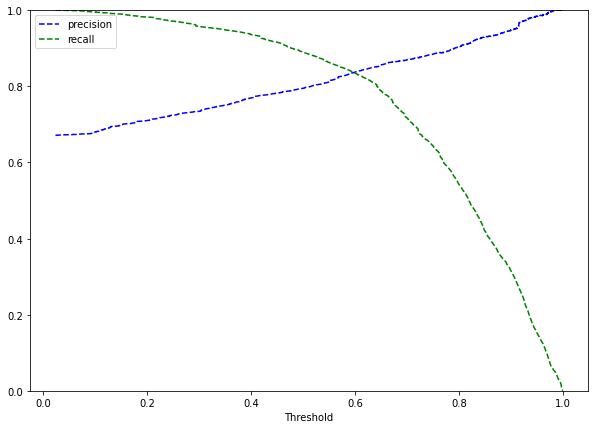

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.58

#### Checking model performance on training set

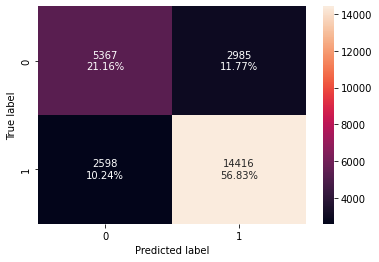

In [ ]:
#### Checking model performance on training set
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.77990,0.84730,0.82846,0.83777


We observe that model is performing well on training data

### Let's check the performance on the test set

In [ ]:
X_test1 = X_test[list(X_train1.columns)]

**Using model with default threshold**

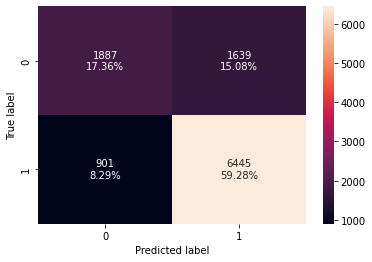

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)


In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.76637,0.87735,0.79725,0.83539


ROC curve on test set

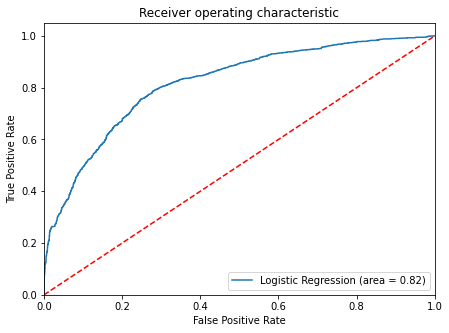

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.66** 

In [ ]:
optimal_threshold_auc_roc

0.6643648519898131

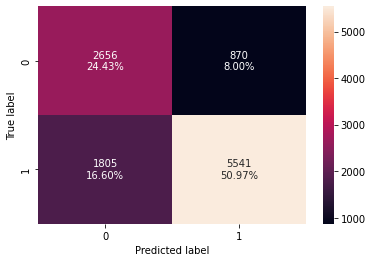

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.75396,0.75429,0.86430,0.80555


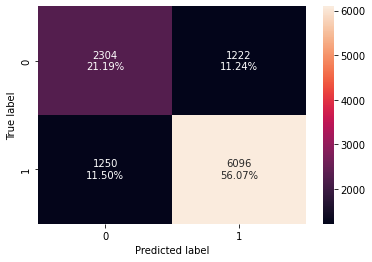

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
optimal_threshold_curve

0.58

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.77263,0.82984,0.83301,0.83142


### Model performance summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.58 Threshold",
    "Logistic Regression-0.66 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.58 Threshold,Logistic Regression-0.66 Threshold
Accuracy,0.77245,0.76567,0.77990
Recall,0.89033,0.77383,0.84730
Precision,0.79500,0.86267,0.82846
F1,0.83997,0.81584,0.83777


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.58 Threshold",
    "Logistic Regression-0.66 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.58 Threshold,Logistic Regression-0.66 Threshold
Accuracy,0.76637,0.75396,0.77263
Recall,0.87735,0.75429,0.82984
Precision,0.79725,0.86430,0.83301
F1,0.83539,0.80555,0.83142


Observation:
* Model gives F1 values of 0.837 & 0.831 on training & testing datasets, i.e. able to explain over 83 % of the information
* The models are able to give generalized performance on both the training as well as the testing datasets

###Building a Decision Tree model

In [ ]:
# As decision trees are immune to multicollinearity in comparison to regression models, we will use all 
# the columns in our dataset

X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1   0.67074
0   0.32926
Name: booking_status, dtype: float64
Percentage of classes in test set:
1   0.67568
0   0.32432
Name: booking_status, dtype: float64


* The assigned weights for 1 and 0 will be ~0.33 and 0.67 respectively


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Decision Tree Model

In [ ]:
model = DecisionTreeClassifier( random_state=1)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

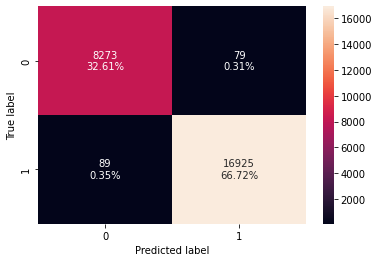

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99338,0.99477,0.99535,0.99506


* We can see that the model is almost perfectly able to classify all points on the training dataset

### Checking model performance on test set

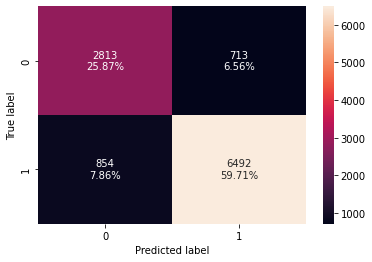

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test


,Accuracy,Recall,Precision,F1
0,0.85587,0.88375,0.90104,0.89231



F1 on the test data is somewhat comparable to what was obtained using the stats model. While the performance is poorer on the testing data set than training

**Before pruning the tree let's check the important features.**

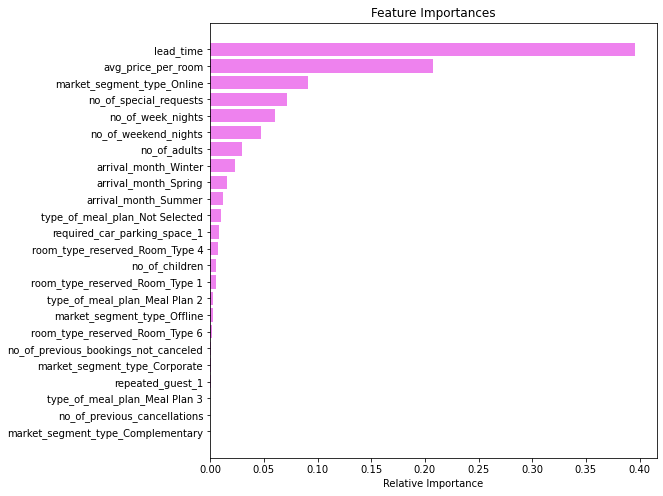

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

We can observe from above plot that lead_time is the most important attribute to predict booking Cancellations according to the decision tree. Followed by room type and market sgement type online.This is inline by what was observed during the EDA (bookings made with higher lead times had a higher odds of cancelations)

### Pruning the tree

**Pre-Pruning**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=70, random_state=1)

#### Checking performance on training set

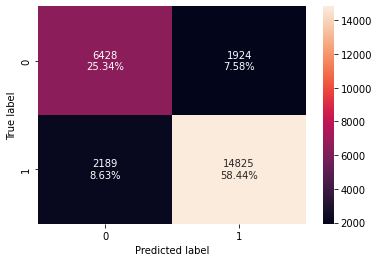

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.99338,0.99477,0.99535,0.99506


#### Checking performance on test set

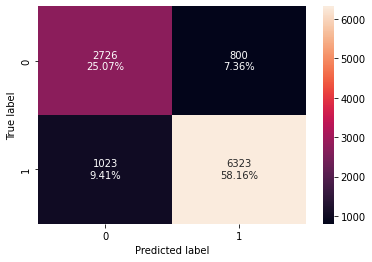

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.85587,0.88375,0.90104,0.89231



F1 on the test data is somewhat comparable to what was obtained using the stats model. While the performance is poorer on the testing data set than training

**Let's use pruning techniques to try and reduce overfitting.**

###Reducing over fitting
**GridSearch for Hyperparameter tuning of our tree model**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
   "max_depth": np.arange(2, 7, 2),
   "max_leaf_nodes": [50, 75, 150, 250],
   "min_samples_split": [10, 30, 50, 70],
  #"max_depth": [np.arange(2, 50, 5), None],
  #"criterion": ["entropy", "gini"],
  #"splitter": ["best", "random"],
  #"min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=70,
                       random_state=1)

###Checking performance on training set

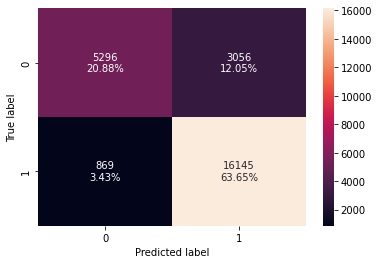

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.84527,0.94892,0.84084,0.89162


###Checking performance on testing set

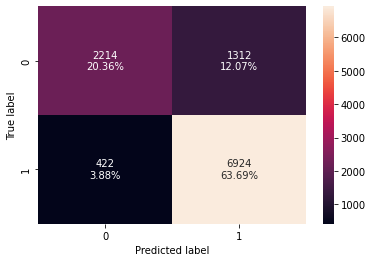

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.84051,0.94255,0.84070,0.88872


* The model is giving a generalized result now on both training & testing datasets
* F1 scores are high - 0.89 and 0.888 for training and testing datasets. The pre tuned model is able to explain close to 88% of contained information

### Visualizing the Decision Tree

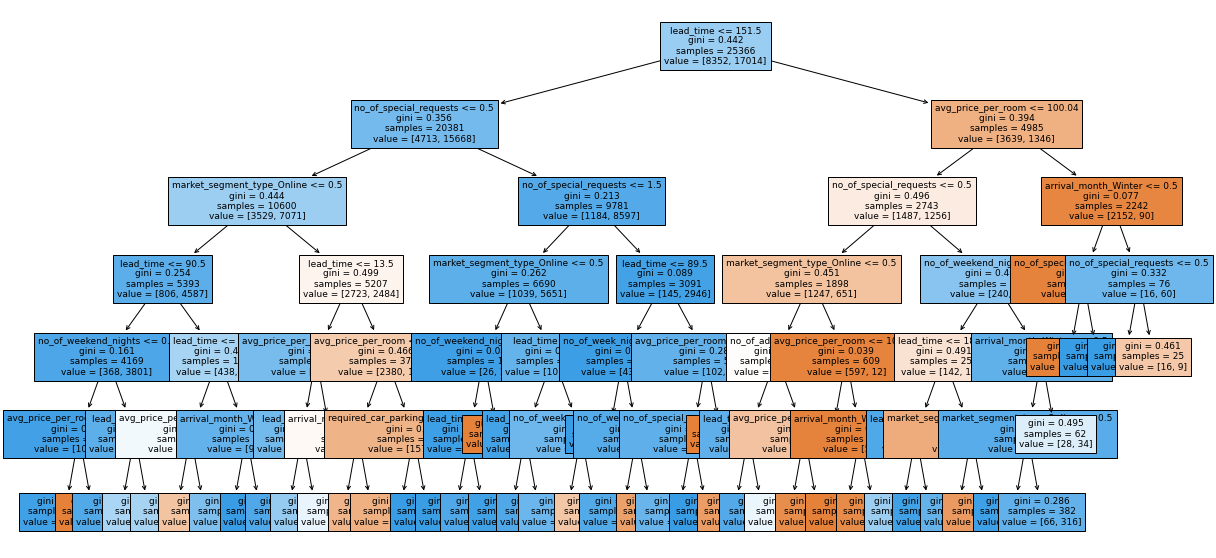

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 215.61
|   |   |   |   |   |   |--- weights: [94.00, 2382.00] class: 1
|   |   |   |   |   |--- avg_price_per_room >  215.61
|   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |--- weights: [149.00, 1225.00] class: 1
|   |   |   |   |   |--- lead_time >  65.50
|   |   |   |   |   |   |--- weights: [111.00, 194.00] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [147.00, 265.00] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [200.00, 106.00]

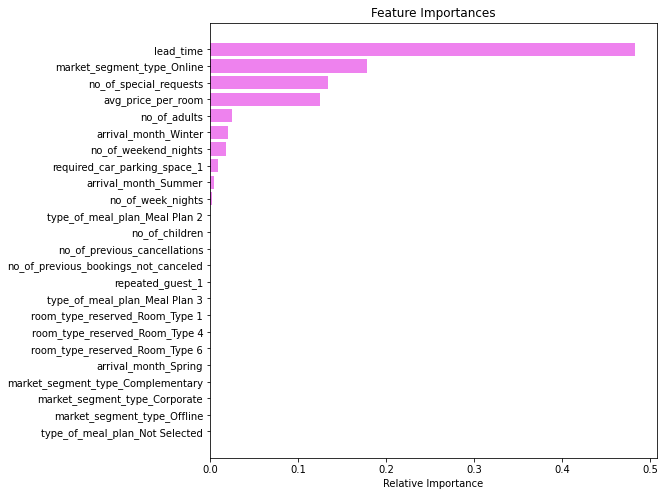

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In pre pruned decision tree, we can observe that lead_time is the most important attribute followed by market_segment_type_online , no of special request & avg_price_per_room to predict cancellations of bookings.


By EDA and observing other models, we can conclude - 

* bookings with higher lead times had a pattern of higher cancelations as well
bookings with more no. of special requests had a pattern of lower cancelations
* Online market segment was found to have more cancellation as  compared to any other market segment like offline, aviation, complimentary etc.,
* avg price per room was found to be higher for canceled bookings than for not canceled bookings (across the board for all market segments) during the EDA process
* arrival_month winter (Dec-Feb)  have a lesser percentage of booking cancelations than summer. Bt at the same time number of bookings in summer months are higher than number of bookings in winter.
* repeated guests generally do not cancel much bookings

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00940
1,0.00000,0.00940
2,0.00000,0.00940
3,0.00000,0.00940
4,0.00000,0.00940
...,...,...
1881,0.00959,0.32741
1882,0.00981,0.33723
1883,0.01234,0.34956
1884,0.03364,0.41685


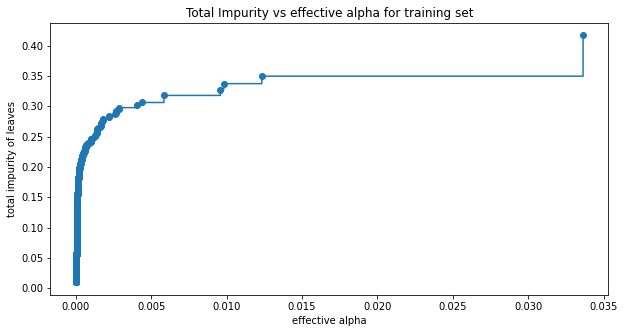

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08315396688287569


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

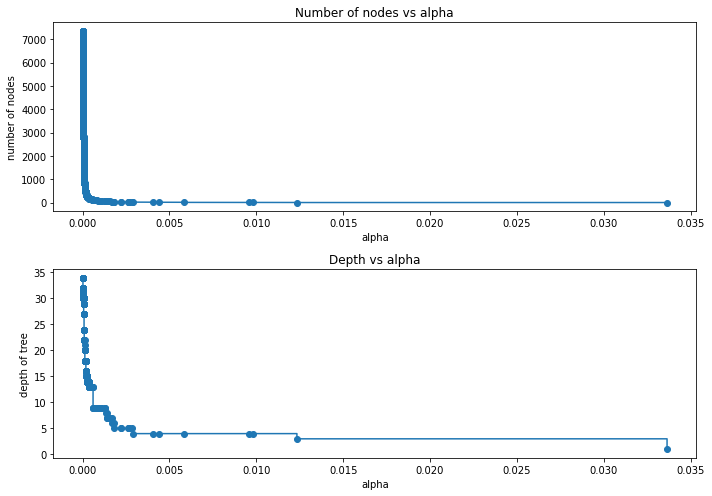

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

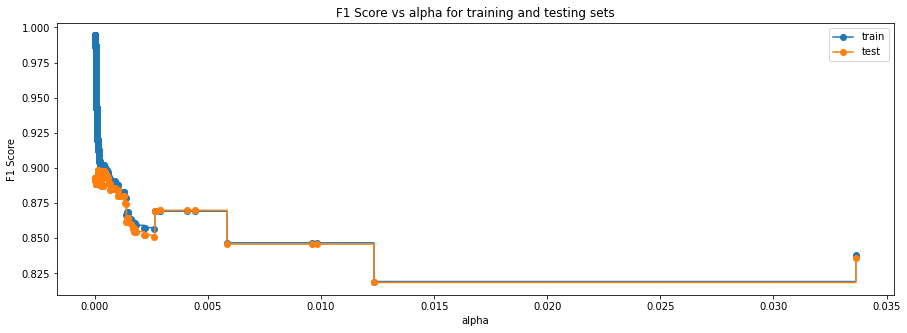

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00015898053170351908,
                       class_weight='balanced', random_state=1)


In [ ]:
#best_model1 = DecisionTreeClassifier(
#    ccp_alpha=0.01, class_weight='balanced', random_state=1
#)
#best_model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', random_state=1)

#### Checking performance on training set

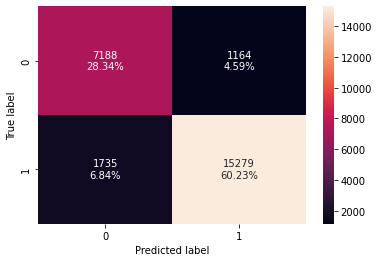

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.88571,0.89803,0.92921,0.91335


#### Checking performance on test set

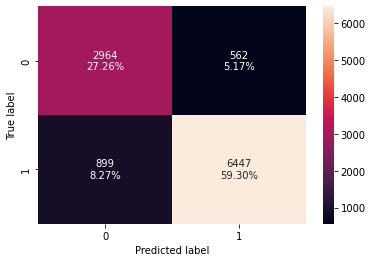

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86562,0.87762,0.91982,0.89822


* The model is giving a generalized performance on training & testing sets
* The F1 performance is comparable to that obtained from statsmodel but less optimized that one obtained from pre-pruned tree model

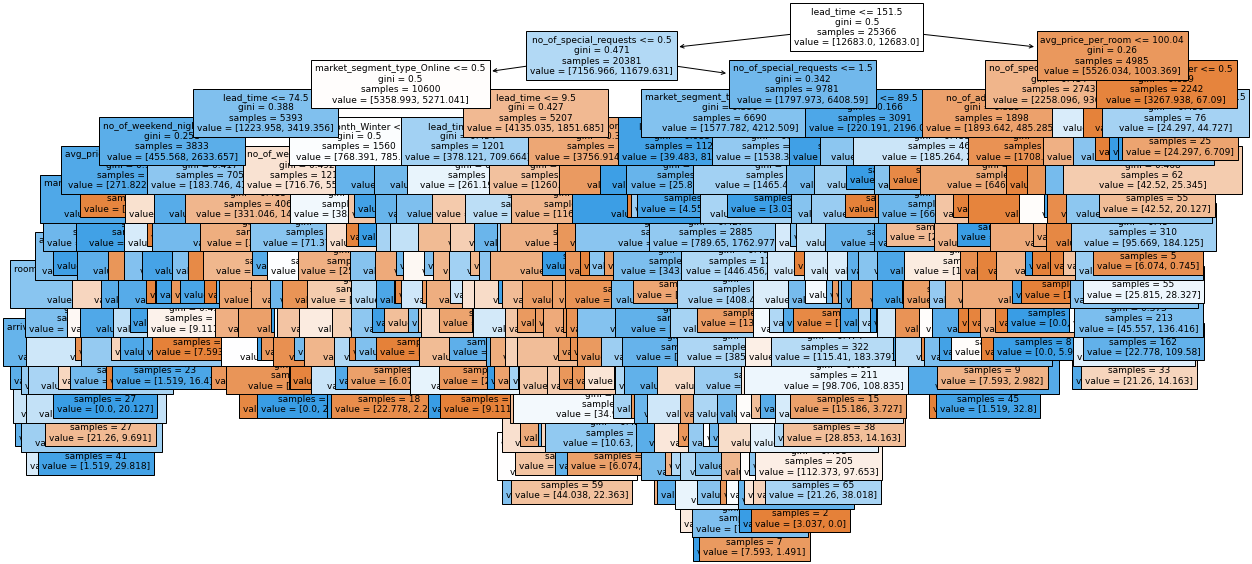

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 74.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- repeated_guest_1 <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 59.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 67.84] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  59.50
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- room_type_reserved

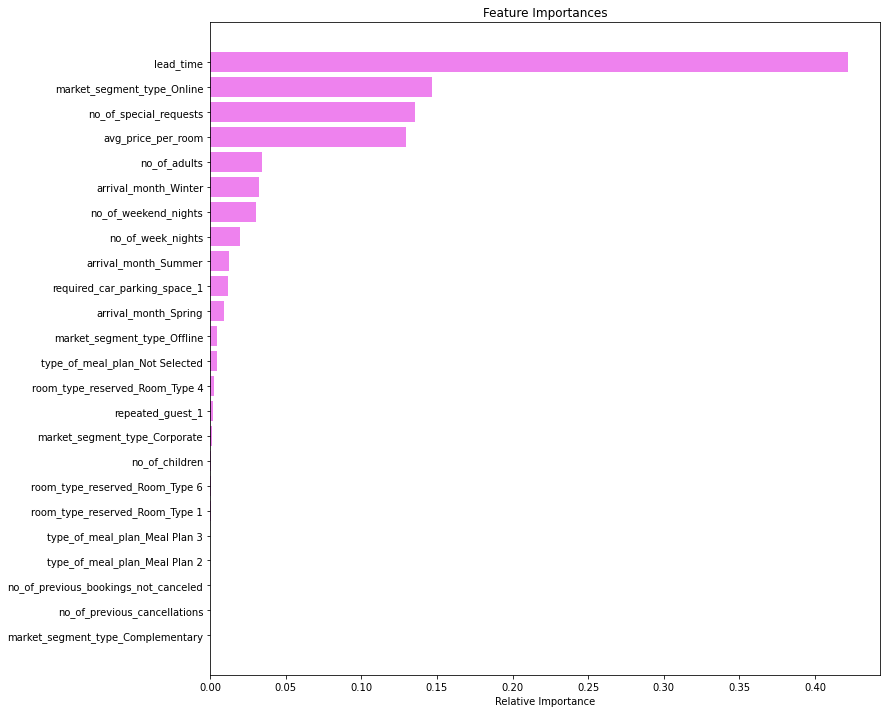

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
 - lead_time, market_segment_type_online & no_of_special_requests are the most 3 important parameters to predict cancelations

- Bookings with higher lead times, have a higher chances of cancelations
Bookings with more number of special requests have very low chances of cancelations


### Comparing Decision Tree models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99338,0.84527,0.88571
Recall,0.99477,0.94892,0.89803
Precision,0.99535,0.84084,0.92921
F1,0.99506,0.89162,0.91335


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.85587,0.84051,0.86562
Recall,0.88375,0.94255,0.87762
Precision,0.90104,0.84070,0.91982
F1,0.89231,0.88872,0.89822


* Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree. 

###Conclusion and Recommendations

* The model build can be used to predict cancelations or no cancelations for bookings with a confidence of ~89%. 
* It has been observed that lead time was the most important feature as longer lead time adds up more cancellations.
>> Hotel should introduce new policies to restrict advance bookings made certain number of days before the check in date to avoid long lead time.

* It has been observed that , the repeat guests have lower frequency of cancelations. 
>> Appreciation in the form of offers like discounts, free breakfast etc can be introduced by the management to attract regular guests.

* Fall and summer months have more booking, as well as more cancellations than winter months. 
>> Policies and plans like more cancellation charges than usual for these popular season can be implemented by management team. This will prevent cancellation and less loss for hotel by cancellations. At the same time, less cancellation charges and discounts on advance booking for winter months can be benefitted by getting more bookings/less cancellations.

* Majority of customers have preferred Room Type 1. 
>> The room type 1 should be marketed properly and priced optimally in order to profit more out of it and also to attrack more customer.

* At the sae time, seems like no one booked Room type 3 and also type 5 , 7 are not so popular. 
>> Management should have a plan to renovate or upgrade these room to be as good as room type 1 and promote it

* Across all market segments, avg price per room has been higher in instances where bookings have been canceled than in instances where bookings have not been canceled. More competition information is required to ensure that our pricing is competitive to retain guests

* Meal type 3 seems to be not choosen by anyone. 
>> Hotel management team should made some improvements on manu of meal plan 3 and promote it by giving discount with room booking. 

* Majority of the bookings does not have any special requests but we observed that the bookings with special requests are less likely to be canclled. 
>>So, customers should be encouraged to place special request. Hotel marketing team should promote it properly.
